In [2]:
import pandas as pd
df_final = pd.read_csv('./input/cleaned_enriched_df.csv')

In [3]:
accepted_states = sorted(list(set(df_final['state'])))

In [9]:
', '.join(accepted_states)

'Austria, Brazil, Croatia, Czech Republic, Denmark, Finland, Greece, Hong Kong, Hungary, Ireland, Norway, Poland, Singapore, South Korea, Sweden, Taiwan, Thailand, United Kingdom, United States of America'

1    30
2     5
Name: stars, dtype: int64


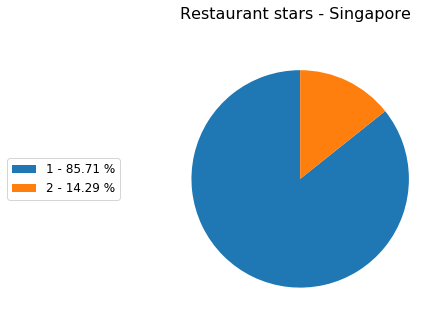

In [18]:
print(df_filtered['stars'].value_counts())

x = np.array(df_filtered['stars'].value_counts().index.tolist())
y = np.array([e for e in df_filtered['stars'].value_counts()])

porcent = 100.*y/y.sum()

fig = plt.gcf()
fig.set_size_inches(5,5)

patches, texts = plt.pie(y, startangle=90)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.6, 0.5),
           fontsize=12)

fig.suptitle('{} - {}'.format('Restaurant stars', state), fontsize=16)

plt.show()
# plt.savefig('piechart.png', bbox_inches='tight')

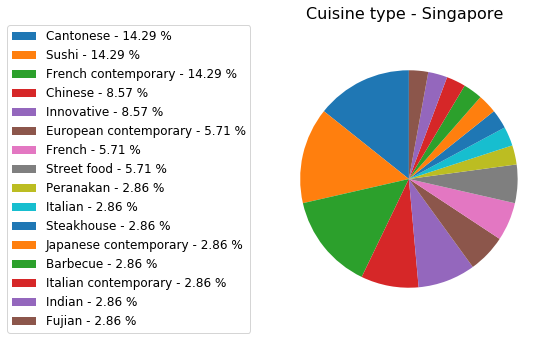

In [156]:
print(df_filtered['cuisine'].value_counts())

x = np.array(df_filtered['cuisine'].value_counts().index.tolist())
y = np.array([e for e in df_filtered['cuisine'].value_counts()])
porcent = 100.*y/y.sum()

fig = plt.gcf()
fig.set_size_inches(5,5)

patches, texts = plt.pie(y, startangle=90)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-1, 0.5),
           fontsize=12)

fig.suptitle('{} - {}'.format('Cuisine type', state), fontsize=16)

plt.show()
# plt.savefig('piechart.png', bbox_inches='tight')

In [ ]:
# display(df_filtered.groupby(['stars', 'cuisine']).size().reset_index(name="count"))
# display(df_filtered.groupby(['stars'])['max_price_EUR'].mean().reset_index(name="average_max_price"))
# display(df_filtered.groupby(['cuisine'])['max_price_EUR'].mean().reset_index(name="average_max_price"))
# display(df_filtered.groupby(['stars', 'cuisine'])['max_price_EUR'].mean().reset_index(name="average_max_price"))
# df_filtered.groupby(['stars', 'cuisine']).agg(count=('size'), mean=('max_price_EUR', 'mean')).reset_index()
# df_filtered.groupby(['stars', 'cuisine'])['min_price_EUR','max_price_EUR'].mean().astype(int)

In [ ]:
# Web scraping https://guide.michelin.com to get some services:
# names_list = []
i = 0
services_list = []
for e in df_final['url']:
    soup = get_soup(e)
    services = soup.select('.restaurant-details__services--content')
    services_rest = [re.sub('\n','',e.text) for e in services]
    services_list.append([df_final.at[i,'name'], services_rest])
    i+=1
print(services_list)

In [ ]:
# foursquare_request_venues_authorized('explore', df_final['latitude'][0], df_final['longitude'][0], 'restaurant')

In [ ]:
# foursquare_menu_hours_authorized('hours',data['id'])

In [10]:
# df_final.to_csv('./input/cleaned_enriched_df.csv', index=False)